# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [2]:
import pandas as pd
from geopy.geocoders import Nominatim

df = pd.read_csv('assets/real_estate.csv', sep=';')
df = pd.DataFrame(df)

#Obtaining most expensive house item and price
most_expensive_house_value = df.loc[df['price'].idxmax()]
expensive_house_price = (most_expensive_house_value['price']) 
expensive_house_address = (most_expensive_house_value['address'])
print(f'The house with address {expensive_house_address} is the most expensive and its price is {expensive_house_price} USD')

"""
#Obtaining adress based in  longitude and latitude 

latitude = most_expensive_house_value[('latitude')]
latitude = float(latitude.replace(",","."))

longitude = most_expensive_house_value['longitude']
longitude = float(longitude.replace(",","."))

def get_address(lat,lon):
    geolocator = Nominatim(user_agent="geoapiExersices")
    location = geolocator.reverse((lat, lon))
    return location.address


address = get_address(latitude,longitude)

print(f'The house with address {address} is the most expensive and its price is {house_price} USD')
   
"""

The house with address El Escorial is the most expensive and its price is 8500000 USD


'\n#Obtaining adress based in  longitude and latitude \n\nlatitude = most_expensive_house_value[(\'latitude\')]\nlatitude = float(latitude.replace(",","."))\n\nlongitude = most_expensive_house_value[\'longitude\']\nlongitude = float(longitude.replace(",","."))\n\ndef get_address(lat,lon):\n    geolocator = Nominatim(user_agent="geoapiExersices")\n    location = geolocator.reverse((lat, lon))\n    return location.address\n\n\naddress = get_address(latitude,longitude)\n\nprint(f\'The house with address {address} is the most expensive and its price is {house_price} USD\')\n   \n'

#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [3]:
#Reviewing colums in data frame

#print(df.columns)

#Obtaining cheapest house item , an address price
min_house_value_index = df[df['price']> 0]['price'].idxmin()

if df.at[min_house_value_index,'price'] > 0:
    min_house_value = df.loc[min_house_value_index]
   
house_price = (min_house_value['price']) 

house_address_cheaper = (min_house_value['address']) 

print(f'The house with address {house_address_cheaper} is the cheapest and its price is {house_price} USD')

"""
#Obtaining address based in  longitude and latitude 

latitude = min_house_value[('latitude')]
latitude = float(latitude.replace(",","."))

longitude = min_house_value['longitude']
longitude = float(longitude.replace(",","."))

def get_address(lat,lon):
    geolocator = Nominatim(user_agent="geoapiExersices")
    location = geolocator.reverse((lat, lon))
    return location.address


address = get_address(latitude,longitude)

print(f'The house with address {address} is the cheapest and its price is {house_price} USD')
"""

The house with address Berlin, Coslada is the cheapest and its price is 600 USD


'\n#Obtaining address based in  longitude and latitude \n\nlatitude = min_house_value[(\'latitude\')]\nlatitude = float(latitude.replace(",","."))\n\nlongitude = min_house_value[\'longitude\']\nlongitude = float(longitude.replace(",","."))\n\ndef get_address(lat,lon):\n    geolocator = Nominatim(user_agent="geoapiExersices")\n    location = geolocator.reverse((lat, lon))\n    return location.address\n\n\naddress = get_address(latitude,longitude)\n\nprint(f\'The house with address {address} is the cheapest and its price is {house_price} USD\')\n'

#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [4]:

#Obtaining biggest house item and surface
biggest_house_data_row = df.loc[df['surface'].idxmax()]
biggest_house_surface = (biggest_house_data_row['surface']) 
biggest_house_address = (biggest_house_data_row['address'])


print(f'The biggest house is located on {biggest_house_address} and its surface is {biggest_house_surface} meters')

"""
#Obtaining address based in  longitude and latitude 

latitude = biggest_house_data_row[('latitude')]
latitude = float(latitude.replace(",","."))

longitude = biggest_house_data_row['longitude']
longitude = float(longitude.replace(",","."))

address_biggest_house = get_address(latitude,longitude)

print(f'The biggest house is located on {address_biggest_house} and its surface is {biggest_house_surface} meters')
"""



The biggest house is located on Sevilla la Nueva and its surface is 249000.0 meters


'\n#Obtaining address based in  longitude and latitude \n\nlatitude = biggest_house_data_row[(\'latitude\')]\nlatitude = float(latitude.replace(",","."))\n\nlongitude = biggest_house_data_row[\'longitude\']\nlongitude = float(longitude.replace(",","."))\n\naddress_biggest_house = get_address(latitude,longitude)\n\nprint(f\'The biggest house is located on {address_biggest_house} and its surface is {biggest_house_surface} meters\')\n'

In [5]:
#Obtaining smallest house item and surface
smallest_house_data_row = df[df['surface']> 0]['surface'].idxmin()
if df.at[smallest_house_data_row,'surface'] > 0:
    min_house_surface = df.loc[smallest_house_data_row]

smallest_house_surface = (min_house_surface['surface'])
smallest_house_address = (min_house_surface['address'])
print(f'The smallest house is located on {smallest_house_address} and its surface is {smallest_house_surface} meters')

"""
#Obtaining address based in  longitude and latitude 
latitude = min_house_surface[('latitude')]
latitude = float(latitude.replace(",","."))

longitude = min_house_surface['longitude']
longitude = float(longitude.replace(",","."))

address_smallest_house = get_address(latitude,longitude)



print(f'The smallest house is located on {address_smallest_house} and its surface is {smallest_house_surface} meters')

"""

The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


'\n#Obtaining address based in  longitude and latitude \nlatitude = min_house_surface[(\'latitude\')]\nlatitude = float(latitude.replace(",","."))\n\nlongitude = min_house_surface[\'longitude\']\nlongitude = float(longitude.replace(",","."))\n\naddress_smallest_house = get_address(latitude,longitude)\n\n\n\nprint(f\'The smallest house is located on {address_smallest_house} and its surface is {smallest_house_surface} meters\')\n\n'

#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [6]:
# Answer considering all level5 colum values:
"""
for i, population in enumerate(df['level5'], start=1):
    print(f'{population}{i}', end=',')
else:
    print(f'{population}{i}')
"""

#Answer with filtered unique elements:

unique_populations = df['level5'].unique()

for i, population in enumerate(unique_populations, start=1):
    print(f'{population}{i}', end=', ')
else:
    print(f'{population}{i}')



Arganda del Rey1, Fuenlabrada2, Boadilla del Monte3, Las Rozas de Madrid4,  Madrid Capital5, Villaviciosa de Odón6, Pinto7, Valdemoro8, Navalcarnero9, Pozuelo de Alarcón10, Torrejón de Ardoz11, Navalagamella12, San Sebastián de los Reyes13, Rivas-vaciamadrid14, Alpedrete15, Móstoles16, San Fernando de Henares17, Coslada18, Becerril de la Sierra19, Alcalá de Henares20, Chinchón21, Parla22, Alcorcón23, El Escorial24, Leganés25, Pedrezuela26, Majadahonda27, Villanueva de la Cañada28, Villanueva del Pardillo29, Torrelodones30, Moralzarzal31, Mejorada del Campo32, Aranjuez33, Corpa34, Getafe35, Velilla de San Antonio36, Sevilla la Nueva37, San Martín de la Vega38, Villalbilla39, Collado Villalba40, Alcobendas41, El Molar (Madrid)42, Moraleja de Enmedio43, Algete44, Campo Real45, Torrejón de la Calzada46, Colmenar Viejo47, Valdemorillo48, Fuente El Saz de Jarama49, Tres Cantos50, Arroyomolinos (Madrid)51, Griñón52, Paracuellos de Jarama53, Guadarrama54, Titulcia55, Galapagar56, Collado Media

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [7]:
#Reviewing Nas in  DataFrame


na_in_dataset = df.isna().any().any

if na_in_dataset:
    for index, row in df.iterrows():
        if row.isna().any():
            na_cols = row.index[row.isna()]
            for col in na_cols: 
                print(f"True, Row {index} / Column {col} ")


True, Row 0 / Column level6 
True, Row 0 / Column level8 
True, Row 0 / Column zipCode 
True, Row 0 / Column customZone 
True, Row 1 / Column surface 
True, Row 1 / Column level6 
True, Row 1 / Column level8 
True, Row 1 / Column zipCode 
True, Row 1 / Column customZone 
True, Row 2 / Column level6 
True, Row 2 / Column level8 
True, Row 2 / Column zipCode 
True, Row 2 / Column customZone 
True, Row 3 / Column level6 
True, Row 3 / Column level8 
True, Row 3 / Column zipCode 
True, Row 3 / Column customZone 
True, Row 4 / Column level6 
True, Row 4 / Column level8 
True, Row 4 / Column zipCode 
True, Row 4 / Column customZone 
True, Row 5 / Column level6 
True, Row 5 / Column level8 
True, Row 5 / Column zipCode 
True, Row 5 / Column customZone 
True, Row 6 / Column level6 
True, Row 6 / Column level8 
True, Row 6 / Column zipCode 
True, Row 6 / Column customZone 
True, Row 7 / Column level6 
True, Row 7 / Column level8 
True, Row 7 / Column zipCode 
True, Row 7 / Column customZone 
Tr

True, Row 71 / Column level4 
True, Row 71 / Column level6 
True, Row 71 / Column zipCode 
True, Row 71 / Column customZone 
True, Row 72 / Column level4 
True, Row 72 / Column level6 
True, Row 72 / Column zipCode 
True, Row 72 / Column customZone 
True, Row 73 / Column level4 
True, Row 73 / Column level6 
True, Row 73 / Column zipCode 
True, Row 73 / Column customZone 
True, Row 74 / Column level4 
True, Row 74 / Column level6 
True, Row 74 / Column zipCode 
True, Row 74 / Column customZone 
True, Row 75 / Column level4 
True, Row 75 / Column level6 
True, Row 75 / Column zipCode 
True, Row 75 / Column customZone 
True, Row 76 / Column level4 
True, Row 76 / Column level6 
True, Row 76 / Column zipCode 
True, Row 76 / Column customZone 
True, Row 77 / Column level4 
True, Row 77 / Column level6 
True, Row 77 / Column zipCode 
True, Row 77 / Column customZone 
True, Row 78 / Column level6 
True, Row 78 / Column level7 
True, Row 78 / Column level8 
True, Row 78 / Column zipCode 
True

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [8]:
original_df_shape = df.shape
df_del_NAS = df.dropna()
df_after_deletions = df_del_NAS.shape

print("Original DataFrame dimensions:",original_df_shape)
print("Cleaned DataFrame dimensions:", df_after_deletions)

Original DataFrame dimensions: (15335, 37)
Cleaned DataFrame dimensions: (0, 37)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [9]:
# filtering "Arroyomolinos(Madrid)" from dataset

filter_df = df[df['level5'] == "Arroyomolinos (Madrid)"]
mean_price = filter_df['price'].mean()


print("The mean price for Arroyomolinos Madrid is", mean_price)

The mean price for Arroyomolinos Madrid is 294541.59854014596


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

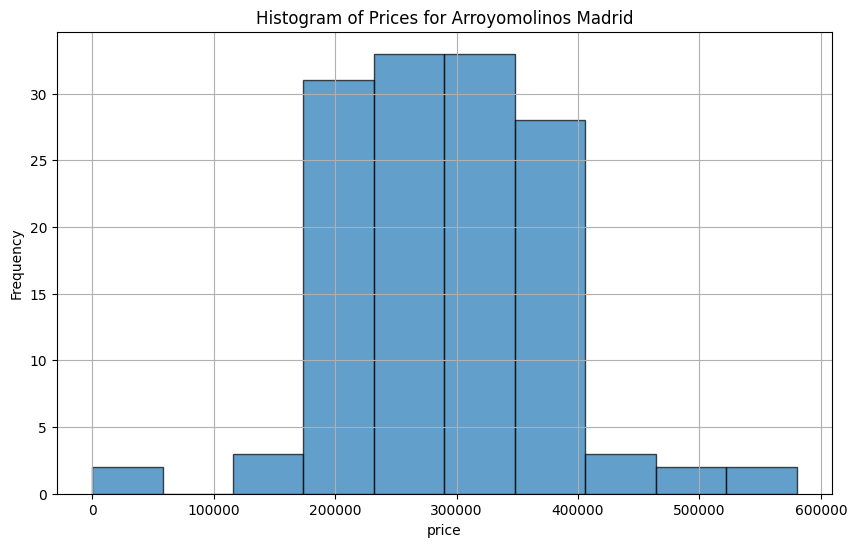

In [10]:
import matplotlib.pyplot as plt

filter_df = df[df['level5'] == "Arroyomolinos (Madrid)"]

plt.figure(figsize=(10, 6))
plt.hist(filter_df['price'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Prices for Arroyomolinos Madrid')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**TODO: Markdown**.   In general, the histogram is  symmetric and bell-shaped, it means there is a low price variability, an consequently that Arromolinos Madrid is a market with stable prices, but is recommended to analize external factors too for a moredetailed analysis, such as  hose surface and location.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [36]:
#Obtaining average prices of "Valdemorillo"  
filter_df = df[df['level5'] == "Valdemorillo"]
mean_price_Valdemorillo = filter_df['price'].mean()
print(f'Average price of Valdemorillo:',mean_price_Valdemorillo)

#Obtaining average prices of "Galapagar"  

filter_df = df[df['level5'] == "Galapagar"]

mean_price_Galapagar = filter_df['price'].mean()
print(f'Average price of Galapagar:', mean_price_Galapagar)

if mean_price_Valdemorillo == mean_price_Galapagar:
    print(f'The average price of both populations is the same ')
elif mean_price_Valdemorillo > mean_price_Galapagar:
    print (f'The average price of Valdemorillo is higher than Galapagar by the amount of {mean_price_Valdemorillo-mean_price_Galapagar} . It could reflect that Valdemorillo is a more desirable place for live and the fact their residents have higher average income ')
elif mean_price_Valdemorillo < mean_price_Galapagar:
    print (f'The average price of Galapagar is higher than Valdemorillo by the amount of {mean_price_Galapagar-mean_price_Valdemorillo}. It could reflect that Galapagar is a more desirable place for live and nd the fact their residents have higher average income ')

Average price of Valdemorillo: 363860.2931034483
Average price of Galapagar: 360063.20238095237
The average price of Valdemorillo is higher than Galapagar by the amount of 3797.090722495923 . It could reflect that Valdemorillo is a more desirable place for live and the fact their residents have higher average income 


#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [39]:
# Creating pps column  containng values of prices per square meter
df['pps'] = df['price'] / df['surface']

#Obtaining prices per square meter "Valdemorillo"  
filter_df = df[df['level5'] == "Valdemorillo"]
mean_pps_Valdemorillo = filter_df['pps'].mean()
print(f'Average pps Valdemorillo:', mean_pps_Valdemorillo)

#Obtaining prices per square meter "Galapagar" 

filter_df = df[df['level5'] == "Galapagar"]
mean_pps_Galapagar = filter_df['pps'].mean()
print(f'Average pps Galapagar:', mean_pps_Galapagar)

if mean_pps_Valdemorillo == mean_pps_Galapagar:
    print(f'The average price per square meter of both populations is the same ')
elif mean_pps_Valdemorillo > mean_pps_Galapagar:
    print (f'The average price per square meter of Valdemorillo is higher than Galapagar by the amount of {mean_price_Valdemorillo-mean_pps_Galapagar} ')
elif mean_pps_Galapagar > mean_pps_Valdemorillo:
    print (f'Average price per square meter of Galapagar is higher than Valdemorillo by the amount of {mean_pps_Galapagar-mean_pps_Valdemorillo}')
    print('Conclusion: The population with higher average price per square metter suggests that location is less affordable  due external factors as better location, reflect better amenities, higher quality of houses. etc.')

Average pps Valdemorillo: 1317.9502109024986
Average pps Galapagar: 1606.3240303094024
Average price per square meter of Galapagar is higher than Valdemorillo by the amount of 288.37381940690375
Conclusion: The population with higher average price per square metter suggests that location is less affordable  due external factors as better location, reflect better amenities, higher quality of houses. etc.


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

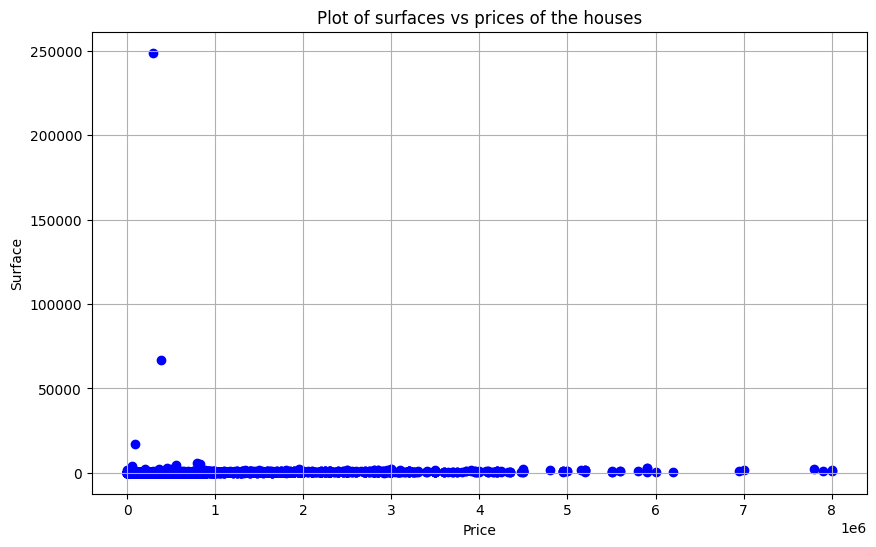

In [41]:
# Creating an scatter plot

plt.figure(figsize=(10,6))
plt.scatter(df['price'], df['surface'], c='blue', alpha=1)

plt.title('Plot of surfaces vs prices of the houses')
plt.xlabel('Price')
plt.ylabel('Surface')
plt.grid(True)
plt.show()

**TODO: Markdown**. The result of plot suggests  that prices are constant regardless of the size of the houses, it could suggest to a low demand for bigger properties in the area.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [14]:

unique_agencies_count = df['realEstate_name'].nunique()

print(f'The dataset contains {unique_agencies_count} real state agencies.')

The dataset contains 1821 real state agencies.


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [15]:
#Obtaining the population with more item houses

most_houses_item = df['level5'].mode()[0]
item_count = df['level5'].value_counts()[most_houses_item]

print(f"The population with most number of houses is {most_houses_item} with {item_count} houses.")

The population with most number of houses is  Madrid Capital with 6643 houses.


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [16]:
selected_populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

south_belt_Madrid = df[df['level5'].isin(selected_populations)]
south_belt_Madrid


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,pps
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,1034.883721
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN,2140.000000
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN,2666.666667
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN,2992.957746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN,1769.230769
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN,2536.363636
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN,2000.000000
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN,1230.769231


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

175000.0


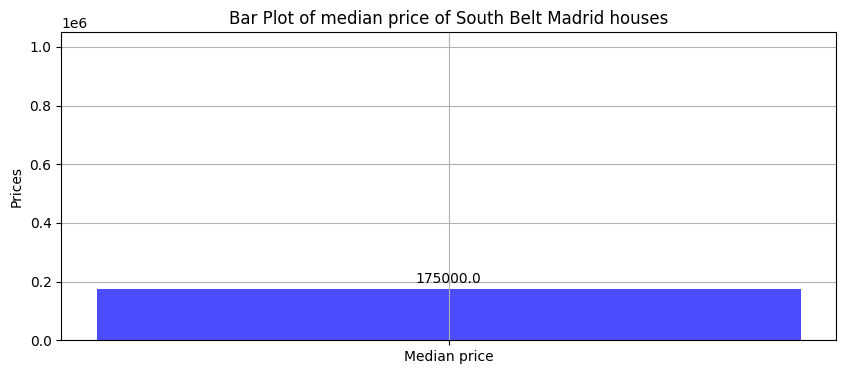

In [17]:
median_subset_price = south_belt_Madrid['price'].median()
print(median_subset_price)

max_price = south_belt_Madrid['price'].max()


median_df = pd.DataFrame({'Metric':['Median price'], 'Value':[median_subset_price]})

#Creating a bar plot
plt.figure(figsize = (10,4))
bars = plt.bar(median_df['Metric'], median_df['Value'],color = 'blue', alpha= 0.7)
plt.ylim(0, max_price)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10000, round(yval,2), ha='center', va = 'bottom')
plt.title('Bar Plot of median price of South Belt Madrid houses')
plt.ylabel('Prices')
plt.grid(True)

plt.show()

**TODO: Markdown**. 
The goal was to determine  the median prices of houses in the  given populations located in South Belt Madrid.
For the analysis we created a subset  with the filtered information of the required populations(level5 colum) and prices (price colum) and it was calculated its  median price on  $175,0000.
The bar plot displays the result, the analysis indicates that  the median price of houses in South Belt Madrid is 175000 what means that half houses are priced below this value.
It is recommended that buyers consider the median price reflects a balaced market in South Belt Madrid.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [18]:
#print(south_belt_Madrid.columns.tolist())

#Obtainig mean and variance of price
mean_price = south_belt_Madrid['price'].mean() 
variance_price = south_belt_Madrid['price'].var()

print(f'Column Price: mean ={mean_price}, variance ={variance_price}')

#Obtainig mean and variance of rooms
mean_rooms = south_belt_Madrid['rooms'].mean()
variance_rooms = south_belt_Madrid['rooms'].var()

print(f'Column Rooms: mean ={mean_rooms}, variance ={variance_rooms}')

#Obtainig mean and variance of surface area

mean_surface_area = south_belt_Madrid['surface'].mean()
variance_surface_area = south_belt_Madrid['surface'].var() 

print(f'Column Surface: mean ={mean_surface_area}, variance ={variance_surface_area}')

#Obtainig mean and variance of bathrooms
mean_bathrooms = south_belt_Madrid['bathrooms'].mean()
variance_bathrooms = south_belt_Madrid['bathrooms'].var() 
print(f'Column Bathrooms: mean ={mean_bathrooms}, variance ={variance_bathrooms}')

Column Price: mean =223094.48070562293, variance =14921367508.04902
Column Rooms: mean =3.0177383592017737, variance =0.7188858892927542
Column Surface: mean =111.75222363405337, variance =4263.051760316337
Column Bathrooms: mean =1.633221850613155, variance =0.5717968625577321


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [19]:
# creating a  new DataFrame from subset-
new_df=pd.DataFrame(south_belt_Madrid)

#Grouping elements by 'level5' column and obtaining the index of maximun price of each gruop

idx_max = new_df.groupby('level5')['price'].idxmax()

#Creating a new DataFrame with maximun prices and adresses of each population
max_prices_df = new_df.loc[idx_max,['level5','price','address']]
print(max_prices_df)

            level5    price                                address
5585      Alcorcón   950000                               Alcorcón
11561  Fuenlabrada   490000  Calle de Paulo Freire, 5, Fuenlabrada
2881        Getafe  1050000                                 Getafe
10412      Leganés   650000           Avenida Reina Sofía, Leganés


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

<function matplotlib.pyplot.show(close=None, block=None)>

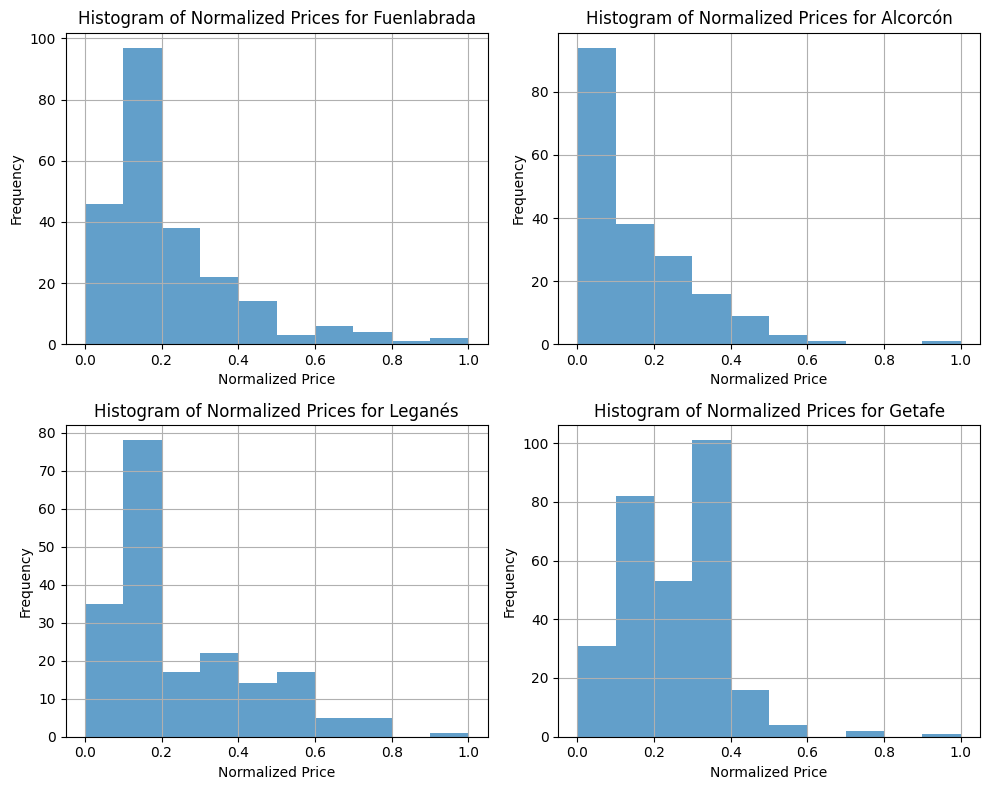

In [30]:
normalized_prices = []
for population in south_belt_Madrid['level5'].unique():
    population_data = south_belt_Madrid[south_belt_Madrid['level5']== population]
    min_price = population_data['price'].min()
    max_price = population_data['price'].max()
    south_belt_Madrid.loc[south_belt_Madrid['level5'] == population, 'Normalized_Price'] = (population_data['price'] - min_price) / (max_price - min_price)

plt.figure(figsize=(10,8))
populations = south_belt_Madrid['level5'].unique()
for i, population in enumerate (populations, start =1):
    plt.subplot(2,2,i)
    south_belt_Madrid[south_belt_Madrid['level5'] == population]['Normalized_Price'].hist(bins = 10, alpha = 0.7)
    plt.title(f'Histogram of Normalized Prices for {population}')
    plt.xlabel('Normalized Price')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show

**TODO: Markdown**. The histograms of Fuenlabradra, Alorcón  and Leganés  shows that majority of house prices is higher,  but also thera are some significantly lower prices too, it could be due  external factors as smaller properties, smalles houses, etc.
Regarding the histogram of Getafe population,  suggest there are two kind of residents in the same population (different market segment and it's sugested to analize it widely.)

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [21]:
south_belt_Madrid_1 = south_belt_Madrid[south_belt_Madrid['level5'].isin(['Getafe','Alcorcón'])].copy()

mean_price_per_sqm = south_belt_Madrid_1.groupby('level5')['pps'].mean()

for town in mean_price_per_sqm.index:
    print(f' The mean price per square metter in {town} is {mean_price_per_sqm[town]:.2f}')
  


 The mean price per square metter in Alcorcón is 2239.30
 The mean price per square metter in Getafe is 2066.31


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

<function matplotlib.pyplot.show(close=None, block=None)>

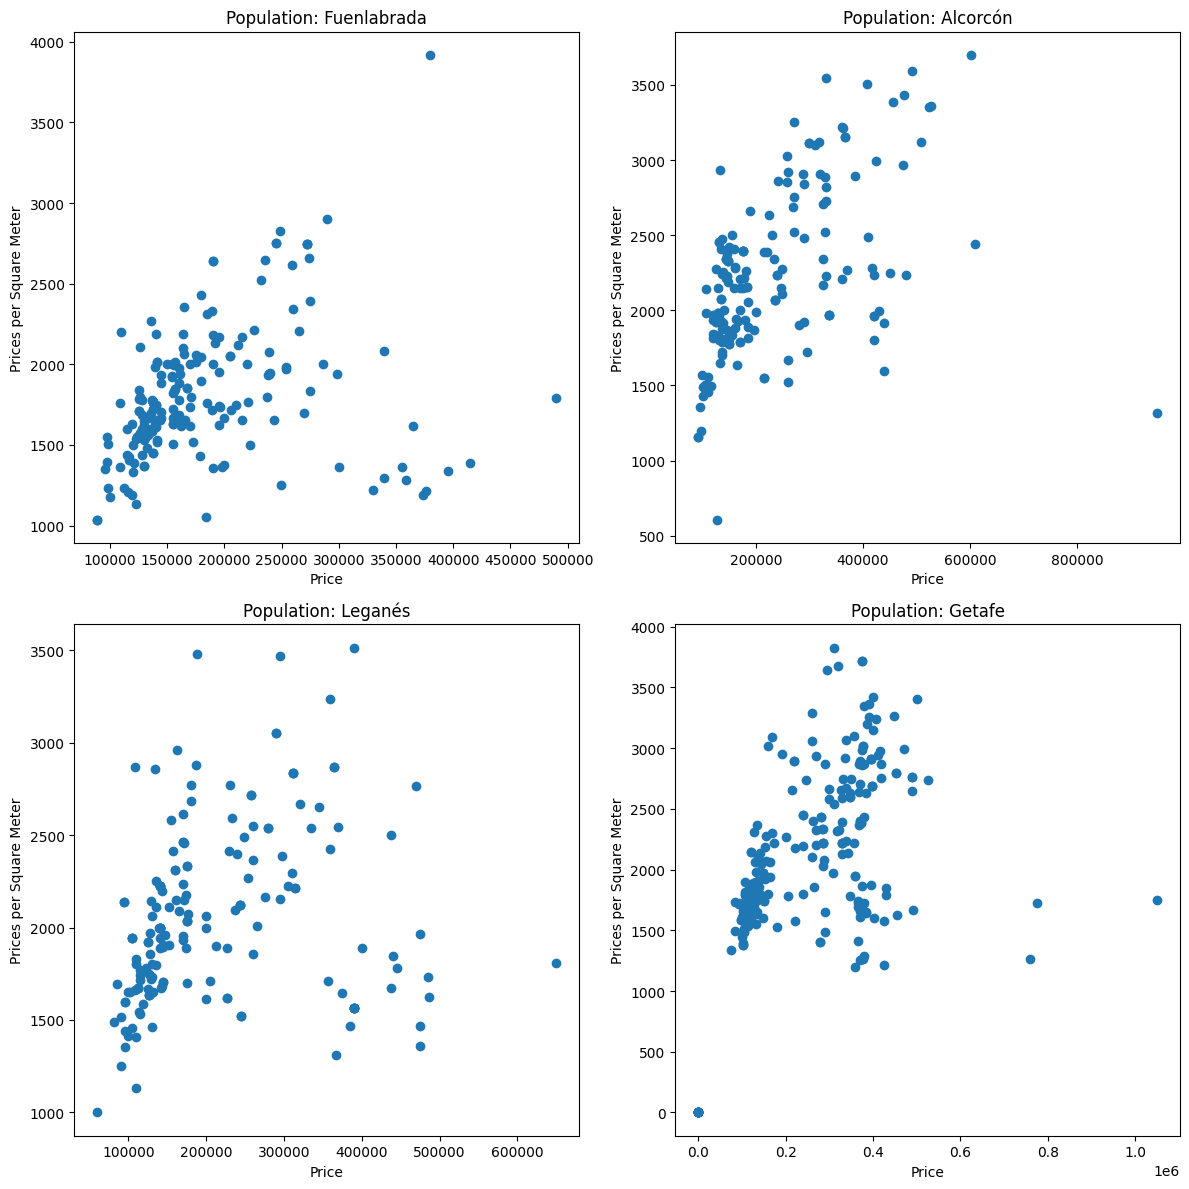

In [29]:
populations = south_belt_Madrid['level5'].unique()

#creating 4 subplots in one figure-

fig, axs = plt.subplots(2,2,figsize=(12,12))


for i, population in enumerate (populations):
    df_pop =south_belt_Madrid[south_belt_Madrid['level5']== population]
    ax = axs[i // 2,i %2]
    ax.scatter(df_pop['price'], df_pop['pps'])
    ax.set_title(f'Scatter Plot house price  & price per square meter{population}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Prices per Square Meter')

plt.tight_layout()
plt.show

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [23]:
from ipyleaflet import Map, basemaps, Marker

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [24]:
from ipyleaflet import Map, Marker, AwesomeIcon, basemaps,Polyline, Color
import random

#Creating the dictionary

coordinates_dict = south_belt_Madrid.set_index('level5')[['latitude','longitude']].T.to_dict('list')

## PUT HERE YOUR CODE:

#Function to generate random colors for each population



def generate_unique_color(assigned_colors, colors):
    while True:
        color = random.choice(colors)
        if color not in assigned_colors:
            assigned_colors.add(color)
            return color
assigned_colors = set()
available_colors =['red' , 'orange', 'green',  'blue', 'purple', 'pink']

#Cretating the Map
map = Map(center = (40.463667, -3.74922), zoom = 10, min_zoom = 1, max_zoom = 300, 
    basemap=basemaps.OpenStreetMap.Mapnik)

    #Cretating the Map
map = Map(center = (40.463667, -3.74922), zoom = 10, min_zoom = 1, max_zoom = 300, 
    basemap=basemaps.OpenStreetMap.Mapnik)

# Plot the coordinates of the estates

previous_location = None
for population, (lat,lon) in coordinates_dict.items():
    color= generate_unique_color(assigned_colors, available_colors)
    icon = AwesomeIcon(name='circle',marker_color=color, icon_color=color, spin=False)
    marker = Marker(location=(float(lat.replace(",",".")),float(lon.replace(",","."))), title =population, icon = icon, icon_color=color, draggable = False)
    map.add_layer(marker)
    current_location = (float(lat.replace(",", ".")), float(lon.replace(",", ".")))
    
    if previous_location:
        line = Polyline(locations=[previous_location, current_location], color=color, weight=5)
        map.add_layer(line)
    
    previous_location = current_location

map


/tmp/ipykernel_680/1468651674.py:6: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  coordinates_dict = south_belt_Madrid.set_index('level5')[['latitude','longitude']].T.to_dict('list')


Map(center=[40.463667, -3.74922], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …